## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


1. Loaded in Data

In [29]:
#loaded in appropriate modules

import pandas as pd
import sqlite3

In [30]:
#connecting to imdb database
conn = sqlite3.connect('zippedData/im.db')

#created a table query
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""


pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [31]:
#loaded in database of movie_basics joined with movie_ratings joined with movie_akas

df = pd.read_sql("""

SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
JOIN movie_akas
    USING(movie_id)


""", conn)

In [32]:
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,IN,hi,None,alternative spelling,0.0


In [33]:
df2 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

In [34]:
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


2. Clean and Manipulate Data

In [35]:
df.drop_duplicates(subset=['movie_id'], inplace=True)
df.drop(columns=['primary_title', 'original_title', 'ordering', 'region', 'types', 'attributes', 'is_original_title'], inplace=True)

In [36]:
df2.rename(columns={'movie': 'title'}, inplace=True)

In [37]:
merged = df.merge(df2, on='title')

In [38]:
merged.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,language,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0339736,2017,98.0,Horror,5.6,2420,Whiplash,None,43,"Oct 10, 2014","$3,300,000","$13,092,006","$38,969,037"
1,tt0393049,2010,98.0,"Comedy,Drama,Romance",5.5,106,Anderson's Cross,None,65,"Dec 31, 2010","$300,000",$0,$0
2,tt0426566,2012,NaN,Drama,6.0,13,Breakdown,None,11,"May 2, 1997","$36,000,000","$50,159,144","$50,159,144"
3,tt0436230,2010,NaN,"Horror,Thriller",6.7,34,The Devil Inside,None,12,"Jan 6, 2012","$1,000,000","$53,262,945","$101,759,490"
4,tt0437086,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,Alita: Battle Angel,None,24,"Feb 14, 2019","$170,000,000","$85,710,210","$402,976,036"


In [39]:
merged.genres = merged.genres.str.split(',')
merged.dropna(subset=['genres'], inplace=True)
merged.drop(columns=['language'], inplace=True)

In [40]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1227
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1225 non-null   object 
 1   start_year         1225 non-null   int64  
 2   runtime_minutes    1127 non-null   float64
 3   genres             1225 non-null   object 
 4   averagerating      1225 non-null   float64
 5   numvotes           1225 non-null   int64  
 6   title              1225 non-null   object 
 7   id                 1225 non-null   int64  
 8   release_date       1225 non-null   object 
 9   production_budget  1225 non-null   object 
 10  domestic_gross     1225 non-null   object 
 11  worldwide_gross    1225 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 124.4+ KB


In [41]:
#creating an unique genre list

genre_columns = []

for i in merged.genres:
    for x in i:
        genre_columns.append(x)

genre_columns = list(set(genre_columns))

genre_columns

['Sport',
 'Romance',
 'Biography',
 'Drama',
 'Crime',
 'Comedy',
 'Documentary',
 'Animation',
 'Musical',
 'Western',
 'Action',
 'War',
 'Music',
 'History',
 'Horror',
 'Fantasy',
 'Adventure',
 'Family',
 'Thriller',
 'News',
 'Sci-Fi',
 'Mystery']

In [42]:
#created a function to add genre columns encoded by 1 (if movie fits this genre) and 0 (if movie doesn't fit this genre)

def binary_genres(lst, genre):
    
    if genre in lst:
        return 1
    else:
        return 0

In [43]:
#looping through genre columns to apply binary_genres function to add new columns
for i in genre_columns:
    merged[i] = merged.genres.apply(lambda x: binary_genres(x, i))

In [44]:
merged

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Music,History,Horror,Fantasy,Adventure,Family,Thriller,News,Sci-Fi,Mystery
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014","$3,300,000",...,0,0,1,0,0,0,0,0,0,0
1,tt0393049,2010,98.0,"[Comedy, Drama, Romance]",5.5,106,Anderson's Cross,65,"Dec 31, 2010","$300,000",...,0,0,0,0,0,0,0,0,0,0
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997","$36,000,000",...,0,0,0,0,0,0,0,0,0,0
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012","$1,000,000",...,0,0,1,0,0,0,1,0,0,0
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019","$170,000,000",...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,tt8266310,2019,117.0,"[Biography, Comedy, Drama]",6.2,173,Blinded by the Light,64,"Aug 14, 2019","$15,000,000",...,0,0,0,0,0,0,0,0,0,0
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998","$53,000,000",...,0,0,0,0,0,0,0,0,0,0
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018","$5,000,000",...,0,0,0,0,0,0,0,0,0,0
1226,tt8816388,2018,28.0,[Documentary],5.7,7,Demonic,56,"Oct 10, 2017","$3,000,000",...,0,0,0,0,0,0,0,0,0,0


In [45]:
#converting production_budget type from str -> float
merged.production_budget = merged['production_budget'].str.strip('$')
merged.production_budget = merged['production_budget'].str.replace(',', '')
merged.production_budget = merged.production_budget.astype('float')

In [46]:
#converting worldwide_gross type from str -> float
merged.worldwide_gross = merged['worldwide_gross'].str.strip('$')
merged.worldwide_gross = merged['worldwide_gross'].str.replace(',', '')
merged.worldwide_gross = merged.worldwide_gross.astype('float')

In [47]:
#converting domestic_gross type from str -> float
merged.domestic_gross = merged['domestic_gross'].str.strip('$')
merged.domestic_gross = merged['domestic_gross'].str.replace(',', '')
merged.domestic_gross = merged.domestic_gross.astype('float')

In [49]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1227
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1225 non-null   object 
 1   start_year         1225 non-null   int64  
 2   runtime_minutes    1127 non-null   float64
 3   genres             1225 non-null   object 
 4   averagerating      1225 non-null   float64
 5   numvotes           1225 non-null   int64  
 6   title              1225 non-null   object 
 7   id                 1225 non-null   int64  
 8   release_date       1225 non-null   object 
 9   production_budget  1225 non-null   float64
 10  domestic_gross     1225 non-null   float64
 11  worldwide_gross    1225 non-null   float64
 12  Sport              1225 non-null   int64  
 13  Romance            1225 non-null   int64  
 14  Biography          1225 non-null   int64  
 15  Drama              1225 non-null   int64  
 16  Crime              1225 

In [52]:
#created a dataframe without zero values for worldwide_gross and domestic_gross

main_df = merged[(merged.worldwide_gross != 0) & (merged.domestic_gross != 0)]

In [57]:
#calculated return on investment (ROI) for movies-- worldwide and domestic 
#metric to measure the rate of return on money budgeted for production 

main_df['ROI_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.production_budget) *100
main_df['ROI_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.production_budget) *100

<ipython-input-57-cf914e6dd36e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['ROI_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.production_budget) *100
<ipython-input-57-cf914e6dd36e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['ROI_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.production_budget) *100


In [58]:
#calcuated gross profit margin for movies -- worldwide and domestic
#assess how efficiently the company generates profit from sales of products

main_df['gross_profit_margin_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.worldwide_gross
                                           )*100
main_df['gross_profit_margin_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.domestic_gross
                                           )*100

<ipython-input-58-49c123f48592>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['gross_profit_margin_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.worldwide_gross
<ipython-input-58-49c123f48592>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['gross_profit_margin_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.domestic_gross


In [62]:
#returns number of genres as a column where values takes the length of list in genres column
main_df['num_of_genres'] = main_df.genres.apply(lambda x: len(x))

<ipython-input-62-280e56ad5891>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['num_of_genres'] = main_df.genres.apply(lambda x: len(x))


In [63]:
main_df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Family,Thriller,News,Sci-Fi,Mystery,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,num_of_genres
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,0,1080.879909,296.727455,91.531738,74.793779,1
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,0,0,39.330956,39.330956,28.228440,28.228440,1
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,1,0,0,0,10075.949000,5226.294500,99.017291,98.122522,2
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,0,0,0,1,0,137.044727,-49.582229,57.813869,-98.342765,3
5,tt0443272,2012,150.0,"[Biography, Drama, History]",7.4,228701,Lincoln,73,"Nov 9, 2012",65000000.0,...,0,0,0,0,0,320.532740,180.319958,76.220639,64.326479,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,tt7961060,2018,100.0,"[Action, Adventure, Animation]",8.0,16465,Dragon Ball Super: Broly,36,"Jan 16, 2019",8500000.0,...,0,0,0,0,0,1344.091235,257.373588,93.075230,72.018078,3
1221,tt7981492,2018,113.0,"[Horror, Thriller]",4.3,971,Sabrina,60,"Dec 15, 1995",58000000.0,...,0,1,0,0,0,50.172414,-7.830484,33.409874,-8.495742,2
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998",53000000.0,...,0,0,0,0,0,-56.882100,-56.882100,-131.922241,-131.922241,1
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,0,0,0,0,33.074300,27.046120,24.854010,21.288427,1


In [65]:
def rating_scale(rating):
    if rating >=7:
        return 'Great'
    elif rating < 7 and rating >= 5:
        return 'Good'
    else:
        return 'Bad'

In [67]:
main_df['rating'] = main_df.averagerating.apply(lambda x: rating_scale(x))

<ipython-input-67-f7ddebe4a492>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['rating'] = main_df.averagerating.apply(lambda x: rating_scale(x))


In [68]:
main_df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Thriller,News,Sci-Fi,Mystery,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,num_of_genres,rating
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,1080.879909,296.727455,91.531738,74.793779,1,Good
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,0,39.330956,39.330956,28.228440,28.228440,1,Good
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,1,0,0,0,10075.949000,5226.294500,99.017291,98.122522,2,Good
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,0,0,1,0,137.044727,-49.582229,57.813869,-98.342765,3,Great
5,tt0443272,2012,150.0,"[Biography, Drama, History]",7.4,228701,Lincoln,73,"Nov 9, 2012",65000000.0,...,0,0,0,0,320.532740,180.319958,76.220639,64.326479,3,Great
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,tt7961060,2018,100.0,"[Action, Adventure, Animation]",8.0,16465,Dragon Ball Super: Broly,36,"Jan 16, 2019",8500000.0,...,0,0,0,0,1344.091235,257.373588,93.075230,72.018078,3,Great
1221,tt7981492,2018,113.0,"[Horror, Thriller]",4.3,971,Sabrina,60,"Dec 15, 1995",58000000.0,...,1,0,0,0,50.172414,-7.830484,33.409874,-8.495742,2,Bad
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998",53000000.0,...,0,0,0,0,-56.882100,-56.882100,-131.922241,-131.922241,1,Great
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,0,0,0,33.074300,27.046120,24.854010,21.288427,1,Good


3. Analysis of Genres

-Does number of genres of a movie affect its return on investment (ROI)

-Does the type of genre of a movie affect its ROI?

-Does the type of genre affect a movie's rating?

In [74]:
import matplotlib.pyplot as plt

In [75]:
grouped_by_num_of_genres = main_df.groupby(['num_of_genres']).mean()

Text(0.5, 1.0, 'ROI of Movies based on # of Genres (worldwide)')

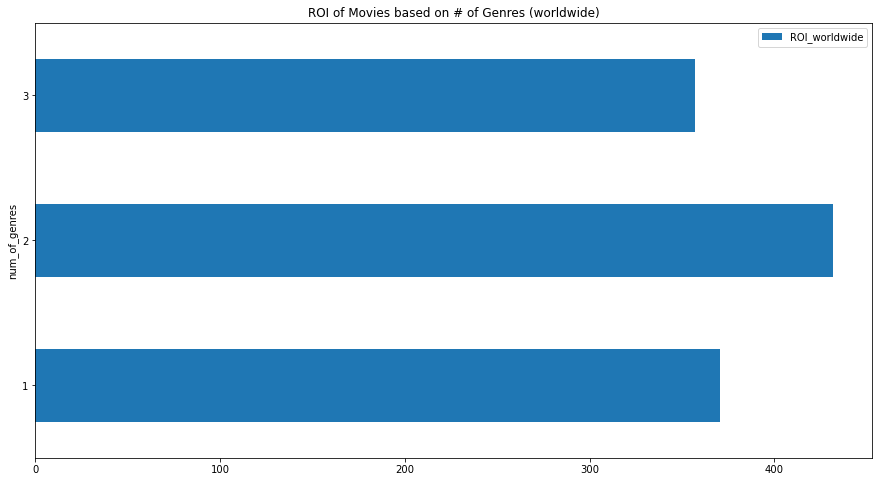

In [78]:
grouped_by_num_of_genres[['ROI_worldwide']].plot(kind = 'barh', figsize=(15,8))
plt.title('ROI of Movies based on # of Genres (worldwide)')